In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#df = pd.read_table("../data/vertebral_column_data/column_2C.dat")
# usecols=['pelvic incidence', 'pelvic tilt','lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis'

In [7]:
col_names =  ['pelvic incidence', 'pelvic tilt','lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis', 'label']

In [8]:
df = pd.read_csv("../data/vertebral_column_data/column_2C.dat", sep = '\s', names = col_names)

/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [9]:
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [10]:
len(df.index)
set(df['label'])
df['label'].iloc[0]
df['label'].replace(['AB','NO'], [1,0], inplace = True)

In [11]:
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


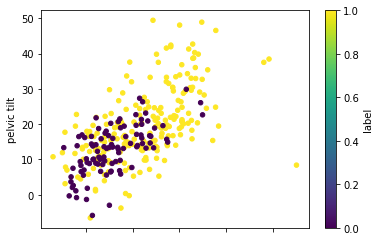

In [12]:
df.plot.scatter(x='pelvic incidence',y='pelvic tilt', c='label',colormap='viridis')
                      
                      

No handles with labels found to put in legend.


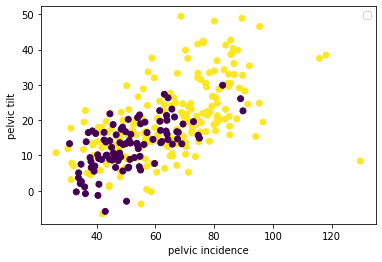

In [13]:
plt.scatter(x= df['pelvic incidence'],y=df['pelvic tilt'],c=df['label'],cmap = 'viridis')
plt.xlabel('pelvic incidence')
plt.ylabel('pelvic tilt')
plt.legend()

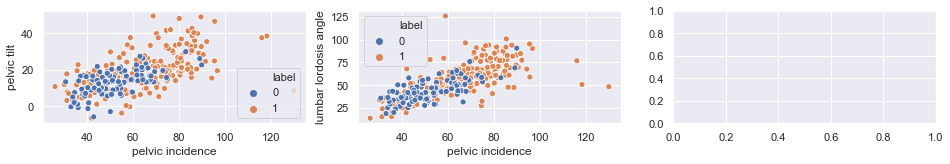

In [14]:
import seaborn as sns; sns.set()
plt.figure(figsize = (16, 12))
ax = plt.subplot(531)
sns.scatterplot(x= 'pelvic incidence',y= 'pelvic tilt', hue= 'label',data=df)
ax = plt.subplot(532)
sns.scatterplot(x= 'pelvic incidence',y= 'lumbar lordosis angle', hue= 'label',data=df)
ax = plt.subplot(533)

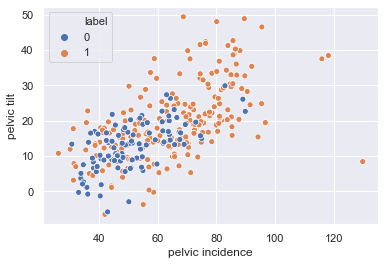

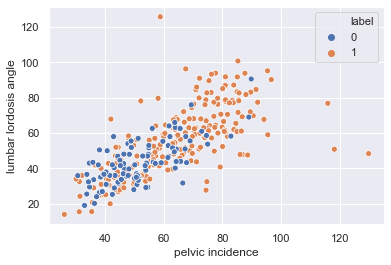

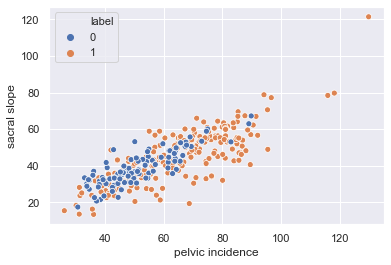

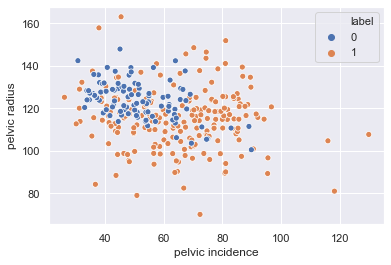

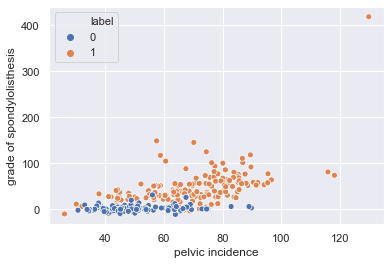

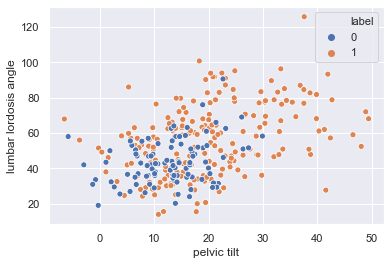

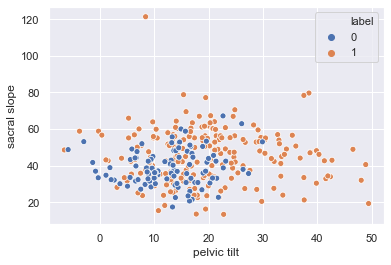

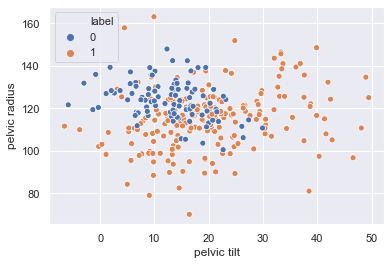

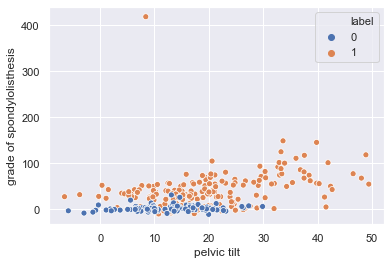

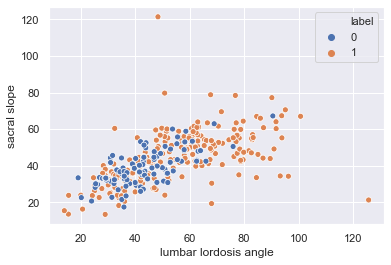

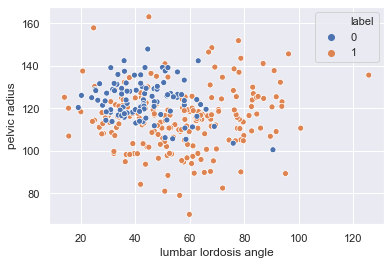

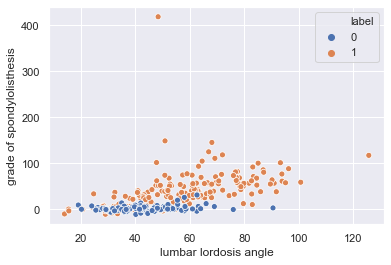

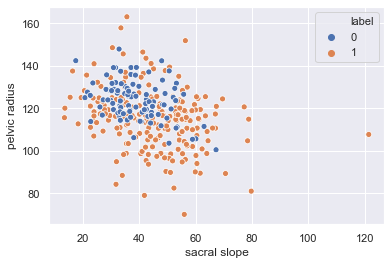

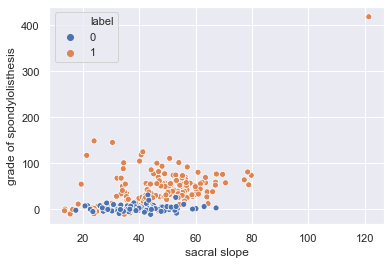

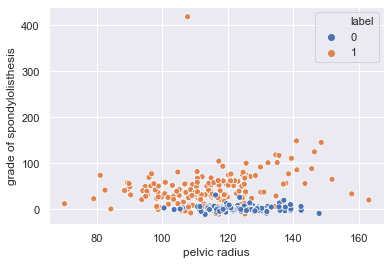

In [15]:
features = col_names[:-1]
a = 0
for i in range(len(features)):
    for j in range(i+1,len(features)): 
        a = a+1
        plt.figure(a)
        sns.scatterplot(x= features[i],y= features[j], hue= 'label',data=df)
              
    

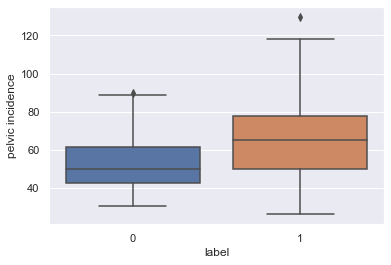

In [16]:
ax = sns.boxplot(x="label", y="pelvic incidence", data=df)

In [17]:
plt.figure(figsize = (50, 30))

<Figure size 3600x2160 with 0 Axes>

<Figure size 3600x2160 with 0 Axes>

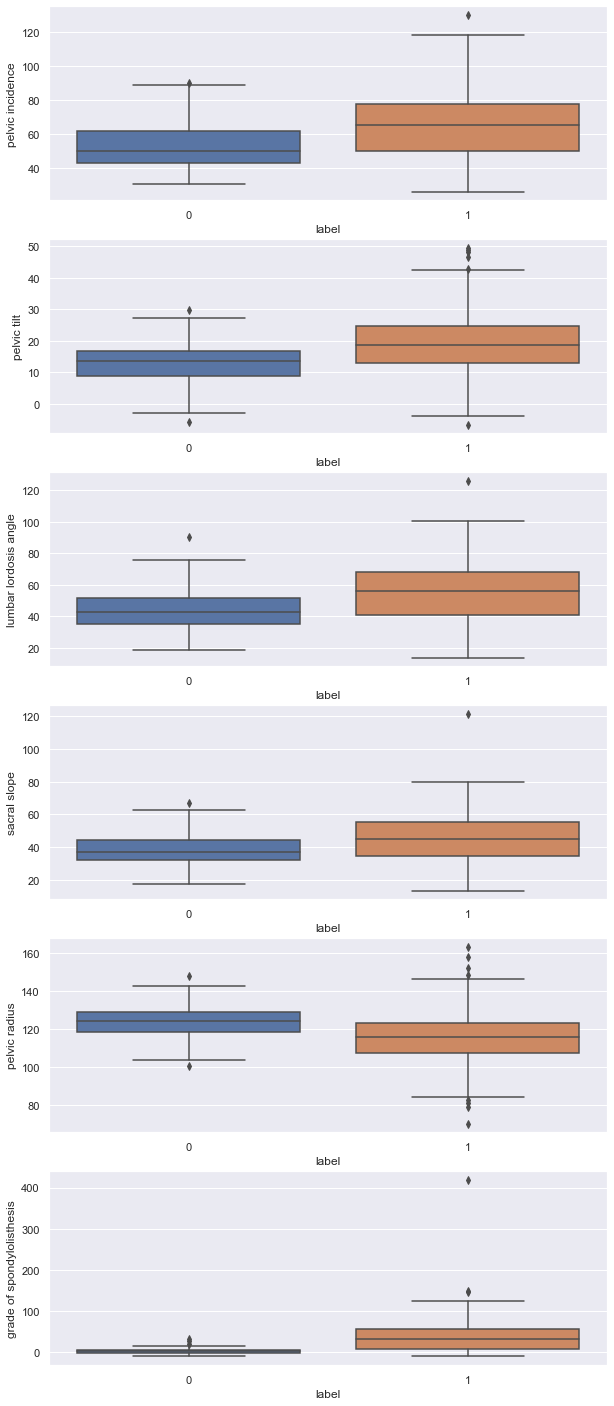

In [18]:
fig, axes = plt.subplots(6,1, figsize = (10, 25))
for i in range(len(features)):
    sns.boxplot(x="label", y= features[i], data=df, ax = axes[i])
   
    

In [19]:
df1 = df[df['label']== 0].iloc[0:70]
#df1.shape
df2 = df[df['label']== 1].iloc[0:140]
#df2.shape
frames = [df1,df2]
df_train = pd.concat(frames)

In [20]:
df_train.shape

(210, 7)

In [21]:
df3 = df[df['label']== 0].iloc[70:]
df4 = df[df['label'] == 1].iloc[140:]
frames2 = [df3,df4]
df_test = pd.concat(frames2)

In [22]:
df_test.shape

(100, 7)

In [42]:
df.shape

(310, 7)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=208, metric = "euclidean")
#model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=208, metric = "euclidean")

In [44]:
df_train.reset_index(drop = True, inplace = True)

In [45]:
df_train.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0


In [46]:
X = df_train[features]

In [47]:
X.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
0,38.51,16.96,35.11,21.54,127.63,7.99
1,54.92,18.97,51.60,35.95,125.85,2.00
2,44.36,8.95,46.90,35.42,129.22,4.99
3,48.32,17.45,48.00,30.87,128.98,-0.91
4,45.70,10.66,42.58,35.04,130.18,-3.39


In [48]:
y = df_train['label']

In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [85]:
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=208, p=2,
                     weights='uniform')

In [86]:
y_pred = model.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
MSE = sum((y - pred)**2)/len(y)
RMSE = np.sqrt(MSE)

In [56]:
RMSE

0.5773502691896257

In [89]:
neigh = np.arange(208,0,-3)
neigh

array([208, 205, 202, 199, 196, 193, 190, 187, 184, 181, 178, 175, 172,
       169, 166, 163, 160, 157, 154, 151, 148, 145, 142, 139, 136, 133,
       130, 127, 124, 121, 118, 115, 112, 109, 106, 103, 100,  97,  94,
        91,  88,  85,  82,  79,  76,  73,  70,  67,  64,  61,  58,  55,
        52,  49,  46,  43,  40,  37,  34,  31,  28,  25,  22,  19,  16,
        13,  10,   7,   4,   1])

In [177]:
def KNNrmse(neigh,X_train,y_train,X_test,y_test, Metric):
    
    rmse_all = []
    for i in neigh:
        if Metric == "mahalanobis" :
            model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i, metric = Metric, metric_params={'V': np.cov(X_train.T)})
        else:
            model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i, metric = Metric)

            
            
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #pred = y_pred
        #MSE = sum((y_test - pred)**2)/len(y_test)
        RMSE = sklearn.metrics.mean_squared_error(y_test, y_pred)
        rmse_all.append(RMSE)
    kmin_index = rmse_all.index(min(rmse_all))
    return [rmse_all, min(rmse_all), kmin_index, neigh[kmin_index]]
    

In [229]:
KNNrmse(np.arange(208,0,-3),X,y,X,y, "euclidean")[3]


1

In [90]:
df_test.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0


In [63]:
df_test.reset_index(drop = True, inplace = True)

In [64]:
df_test.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0


In [65]:
X_test = df_test[features]

In [66]:
X_test.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
0,50.09,13.43,34.46,36.66,119.13,3.09
1,64.26,14.50,43.90,49.76,115.39,5.95
2,53.68,13.45,41.58,40.24,113.91,2.74
3,49.00,13.11,51.87,35.88,126.40,0.54
4,59.17,14.56,43.20,44.60,121.04,2.83


In [67]:
y_test = df_test['label']

In [68]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [230]:
KNNrmse(np.arange(208,0,-3),X,y,X_test,y_test, "euclidean")[1]

0.06

In [ ]:
PLOT BOTH IN SAME PLOT
use plt.show after plotting both the plots

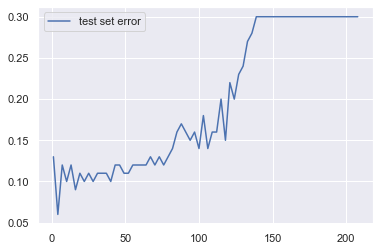

In [173]:
plt.plot(neigh, KNNrmse(neigh,X,y,X_test,y_test,"euclidean")[0], label = 'test set error')
plt.legend()

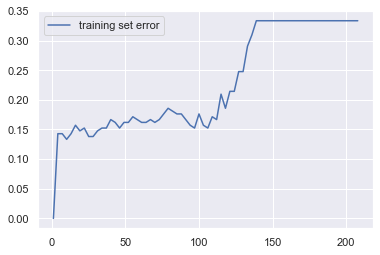

In [179]:
plt.plot(neigh, KNNrmse(neigh,X,y,X,y, "euclidean")[0], label = 'training set error')
plt.legend()

In [175]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors= 4, metric = "euclidean")
model.fit(X,y)
y_pred = model.predict(X_test)
C = sklearn.metrics.confusion_matrix(y_test, y_pred)

In [ ]:
CLASSIFICATION REPORT

In [176]:
C

array([[25,  5],
       [ 1, 69]])

In [97]:
#https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
TP = C[1][1]
TN = C[0][0]
FP = C[0][1]
Precision = TP/(TP+FP)

In [98]:
Precision

0.9324324324324325

In [180]:
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred)

In [181]:
F1_score

0.9583333333333333

In [75]:
np.arange(10,211,10)
df_tr = df_train[df_train['label'] == 0].iloc[:10//3]
df_tr

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0


In [182]:
def create_trainingset(df_train, N):
    df_tr1 = df_train[df_train['label'] == 0].iloc[:N//3]
    df_tr2 = df_train[df_train['label'] == 1].iloc[:(N-(N//3))]
    df_tr =  pd.concat([df_tr1, df_tr2])
    df_tr.reset_index(inplace = True)
    X_tr  = df_tr[features]
    y_tr = df_tr['label']
    return [X_tr, y_tr]
    

In [183]:
# selecting optimal k from {1,6,11,...,196} for each N
def optimal_k(df_train, K, X_test, y_test, N):              # N: sample size list # K: list of possible neighbors
    opt_k = {}
    for i in N:                                                                
        [X_tr, y_tr] = create_trainingset(df_train, i)
        k = [x for x in K if x<i]
        kmin = KNNrmse(k,X_tr,y_tr,X_test,y_test, "euclidean")[3]
        opt_k[i] = kmin
    return opt_k
             
            
            
        

In [114]:
K = np.arange(1,200,5)
[x for x in K if x<100]

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]

In [184]:
optimal_k(df_train, np.arange(1,200,5), X_test, y_test, np.arange(10,211,10))


{10: 1,
 20: 6,
 30: 1,
 40: 11,
 50: 26,
 60: 21,
 70: 26,
 80: 31,
 90: 41,
 100: 6,
 110: 6,
 120: 16,
 130: 16,
 140: 16,
 150: 16,
 160: 6,
 170: 6,
 180: 6,
 190: 6,
 200: 6,
 210: 6}

In [185]:
def learning_curve(df_train, N, X_test, y_test, opt_k ):
    Err = []
    for i in N:
        [X_tr, y_tr] = create_trainingset(df_train, i)
        model = sklearn.neighbors.KNeighborsRegressor(n_neighbors= opt_k[i], metric = "euclidean")
        model.fit(X_tr,y_tr)
        y_pred = model.predict(X_test)
        pred = y_pred        
        MSE = sum((y_test - pred)**2)/len(y_test)
        RMSE = np.sqrt(MSE)
        Err.append(RMSE)
    return [N, Err]
    

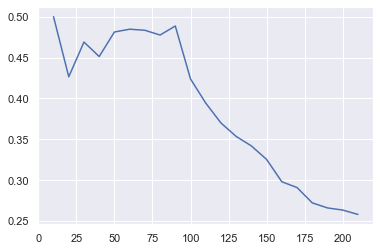

In [186]:
import matplotlib.pyplot as plt
plt.plot(learning_curve(df_train, np.arange(10,211,10), X_test, y_test,optimal_k(df_train, np.arange(1,200,5), X_test, y_test, np.arange(10,211,10)))[0], learning_curve(df_train, np.arange(10,211,10), X_test, y_test, optimal_k(df_train, np.arange(1,200,5), X_test, y_test, np.arange(10,211,10)))[1], 'b')

In [214]:
def bestp(k,X_train,y_train,X_test,y_test, P):
    rmse_all = []
    for i in P:
        model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, metric = "minkowski", p = i)  
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        RMSE = sklearn.metrics.mean_squared_error(y_test, y_pred)
        rmse_all.append(RMSE)
    min_err_idx = rmse_all.index(min(rmse_all))
    p_best = P[min_err_idx]
    best_logp = np.log10(p_best)
    return [min(rmse_all), p_best, best_logp]

In [225]:

def KNN_alldistances(neigh,X_train,y_train,X_test,y_test):
    
    kmin_index_euc = KNNrmse(neigh,X_train,y_train,X_test,y_test, "euclidean")[3]
    minRMSE_euc = KNNrmse(neigh,X_train,y_train,X_test,y_test, "euclidean")[1]
    
    kmin_index_man = KNNrmse(neigh,X_train,y_train,X_test,y_test, "manhattan")[3]
    minRMSE_man = KNNrmse(neigh,X_train,y_train,X_test,y_test, "manhattan")[1]
    
    kmin_index_cheb = KNNrmse(neigh,X_train,y_train,X_test,y_test, "chebyshev")[3]
    minRMSE_cheb = KNNrmse(neigh,X_train,y_train,X_test,y_test, "chebyshev")[1]
                                                                            
    kmin_index_mahan = KNNrmse(neigh,X_train,y_train,X_test,y_test, "mahalanobis")[3]
    minRMSE_mahan = KNNrmse(neigh,X_train,y_train,X_test,y_test, "mahalanobis")[1]
    
    best_logp_minkowski = bestp(kmin_index_man,X,y,X_test,y_test, [10**j for j in np.arange(0.1,1.1,0.1)])[2]
    minRMSE_minkowski = bestp(kmin_index_man,X,y,X_test,y_test, [10**j for j in np.arange(0.1,1.1,0.1)])[0]
    df_comparison = pd.DataFrame([minRMSE_euc, minRMSE_man,minRMSE_cheb, minRMSE_mahan,minRMSE_minkowski] , index = ["euclidean","manhattan","chebyshev","mahalanobis", "minkowski with best logp = " + str(best_logp_minkowski)], columns = ["Least Test Error"])
    
    
    return df_comparison
    

In [149]:
np.arange(1,200,5)

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196])

In [228]:
#Question c.c
KNN_alldistances(np.arange(1,200,5),X,y,X_test,y_test)

,Least Test Error
euclidean,0.08
manhattan,0.11
chebyshev,0.08
mahalanobis,0.17
minkowski with best logp = 0.6,0.06


In [189]:
np.arange(0.1,1.1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [207]:
P = [10**j for j in np.arange(0.1,1.1,0.1)]

In [215]:
bestp(6,X,y,X_test,y_test, P)[0]

0.06

In [218]:
def weightedKNN(neigh,X_train,y_train,X_test,y_test, Metric):
    rmse_all = []
    for i in neigh:
        model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i, metric = Metric, weights = 'distance')     
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        RMSE = sklearn.metrics.mean_squared_error(y_test, y_pred)
        rmse_all.append(RMSE)
    kmin_index = rmse_all.index(min(rmse_all))
    return [rmse_all, min(rmse_all), kmin_index, neigh[kmin_index]]
    

In [222]:
def weighted_alldistances(neigh,X_train,y_train,X_test,y_test):
    
    kmin_index_euc = weightedKNN(neigh,X_train,y_train,X_test,y_test, "euclidean")[3]
    minRMSE_euc = weightedKNN(neigh,X_train,y_train,X_test,y_test, "euclidean")[1]
    
    kmin_index_man = weightedKNN(neigh,X_train,y_train,X_test,y_test, "manhattan")[3]
    minRMSE_man = weightedKNN(neigh,X_train,y_train,X_test,y_test, "manhattan")[1]
    
    kmin_index_cheb = weightedKNN(neigh,X_train,y_train,X_test,y_test, "chebyshev")[3]
    minRMSE_cheb = weightedKNN(neigh,X_train,y_train,X_test,y_test, "chebyshev")[1]
                                                                            
    
    df_comparison = pd.DataFrame([minRMSE_euc, minRMSE_man,minRMSE_cheb] , index = ["euclidean", "manhattan","chebyshev"], columns = ["Least Test Error"])
    
    return df_comparison
    

In [223]:
#Question c.d:
weighted_alldistances(np.arange(1,200,196),X,y,X_test,y_test)

,Least Test Error
euclidean,0.13
manhattan,0.12
chebyshev,0.13


Question c.f:

Lowest Error Rate Achieved is 0.06 ( in 2 cases: 1. While using k=4 and Euclidean distance 2. While using minkowski distance with k = 6 and best logp = 0.6)	

In [235]:
lowesterror = min(KNNrmse(np.arange(208,0,-3),X,y,X_test,y_test, "euclidean")[1], min(KNN_alldistances(np.arange(1,200,5),X,y,X_test,y_test)["Least Test Error"]), min(weighted_alldistances(np.arange(1,200,196),X,y,X_test,y_test)["Least Test Error"] ))

In [236]:
lowesterror 

0.06